# Notebook Aula 04

[![Abrir no Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/16qko0011JtiKALq7__Thjuh0LnnbDimi?authuser=1#scrollTo=paxMXniMCMfe)

In [ ]:
# Step 1: Import necessary libraries
import numpy as np

from sklearn.datasets import make_circles
from sklearn.metrics.pairwise import rbf_kernel

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import rc

import seaborn as sns

In [ ]:
# Set Seaborn style and context for academic plots
sns.set_style("whitegrid", {'grid.linestyle': '--'})  # White background with dashed grid lines
sns.set_context("paper")  # Adjust context to "talk" or "poster" for presentations

# Enable TeX mode for high-quality text rendering
mpl.rcParams['font.family'] = 'serif'

# Configure legend aesthetics
plt.rcParams["legend.facecolor"] = "white"
plt.rcParams["legend.edgecolor"] = "black"
mpl.rcParams['legend.framealpha'] = 1  # Full opacity for better readability

# Adjust figure size for clarity
plt.rcParams['figure.figsize'] = [8, 6]  # Width, height in inches

# Configure axes spines
plt.rcParams['axes.edgecolor'] = 'black'  # Set the border of the axes to black
plt.rcParams['axes.linewidth'] = 0.5  # Set the width of the axes border

Next Step

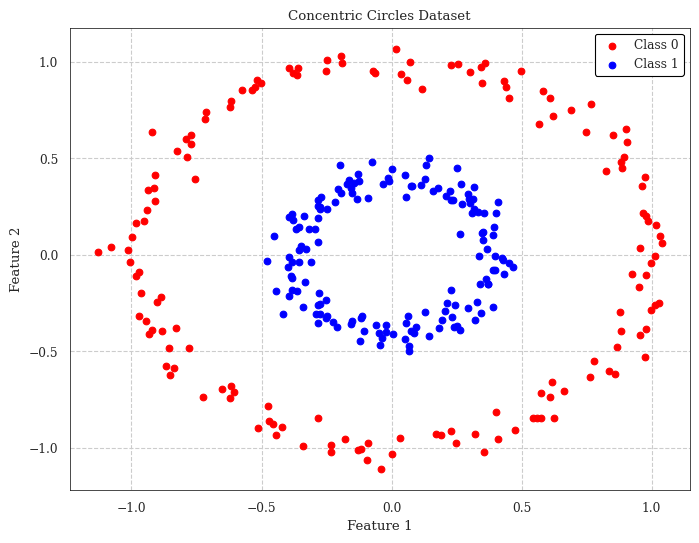

In [ ]:
# Step 2: Generate the concentric circles dataset
X, y = make_circles(n_samples=300, factor=0.4, noise=0.05)

# Step 3: Plot the original data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Concentric Circles Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
# Step 4: Apply a Gaussian transformation to project the data into 3D
# The transformation will add a third dimension based on the Gaussian of the distance from the origin
def gaussian_transform(X, gamma=0.5):
    # Calculate the Euclidean distance from each point to the origin (0,0)
    distances = np.linalg.norm(X, axis=1)
    # Apply the Gaussian function (RBF-like) to these distances to form the third dimension
    Z = np.exp(-gamma * distances ** 2)
    # Return the new 3D data by adding the Gaussian-transformed distances as the third dimension
    return np.column_stack((X, Z))

## Foundations on Gaussian Transformation to Project Data into 3D

Given a dataset $ X = \{X_1, X_2, \ldots, X_m\} $, where $ m $ is the number of samples, each sample $ X_i^2 \in \mathbb{R}^2 $ is represented as $ X_i^2 = (x_i, y_i) $. The goal of the Gaussian transformation is to project this 2D data into a 3D space where it can be linearly separated by a plane.

### Gaussian Transformation

To achieve this, we add a third dimension, $ z_i $, to each point using a Gaussian function of the distance from the point to the origin. For a given point $ X_i^2 = (x_i, y_i) $, the new third coordinate $ z_i $ is defined by:

\begin{align*}
z_i = \exp \left(-\gamma \|X_i^2\|^2\right)
\end{align*}


where:
- $ z_i $ is the third coordinate added to the point,
- $ \gamma $ is a parameter that controls the spread of the transformation,
- $ \|X_i^2\| = \sqrt{x_i^2 + y_i^2} $ is the Euclidean distance from $ X_i^2 $ to the origin $(0, 0)$.

### Complete Transformation

Each 2D point $ X_i^2 = (x_i, y_i) $ is thus transformed into a 3D point $ X_i^3 \in \mathbb{R}^3 $:

\begin{align*}
X_i^3 = (x_i, y_i, z_i) = \left(x_i, y_i, \exp\left(-\gamma \|X_i^2\|^2\right)\right)
\end{align*}


This transformation "lifts" the points closer to the origin higher in the third dimension, creating a separable structure. The concentric rings that are not linearly separable in 2D now form distinct layers in the 3D space, allowing them to be separated by a plane.

### Key Insight

This transformation demonstrates how Gaussian functions can be used to project data into a higher-dimensional space, facilitating linear separability. It is a practical illustration of the kernel trick, simplified to help students understand the fundamental concept behind SVMs and other kernel-based methods without needing to explore the full kernel equations.


Next Step

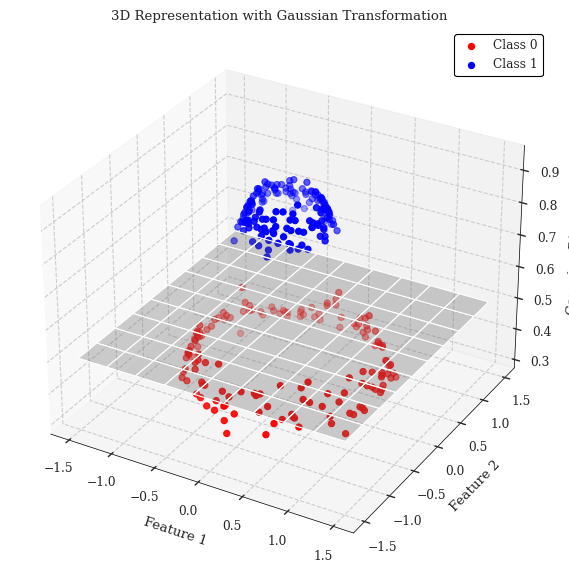

In [ ]:
# Transform the 2D data into 3D using the Gaussian transformation
X_gaussian_3D = gaussian_transform(X, gamma=0.9)

# Step 5: Plot the transformed data in 3D
fig = plt.figure(figsize=(12, 7)) # Update this to use subplot grid

# Plot 3D projection first column of fig, span 3 rows
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_gaussian_3D[y == 0][:, 0], X_gaussian_3D[y == 0][:, 1], X_gaussian_3D[y == 0][:, 2], color='red', label='Class 0')
ax.scatter(X_gaussian_3D[y == 1][:, 0], X_gaussian_3D[y == 1][:, 1], X_gaussian_3D[y == 1][:, 2], color='blue', label='Class 1')

# Create a plane to show separation in the transformed space
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 10), np.linspace(-1.5, 1.5, 10))
zz = 0.5 * np.ones_like(xx)  # This represents a plane in 3D

ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')
ax.set_title('3D Representation with Gaussian Transformation')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Gaussian Distance')
plt.legend()

# Add plots for projections on x-y, x-z and y-z on the second column of fig, each span 1 row
plt.show()


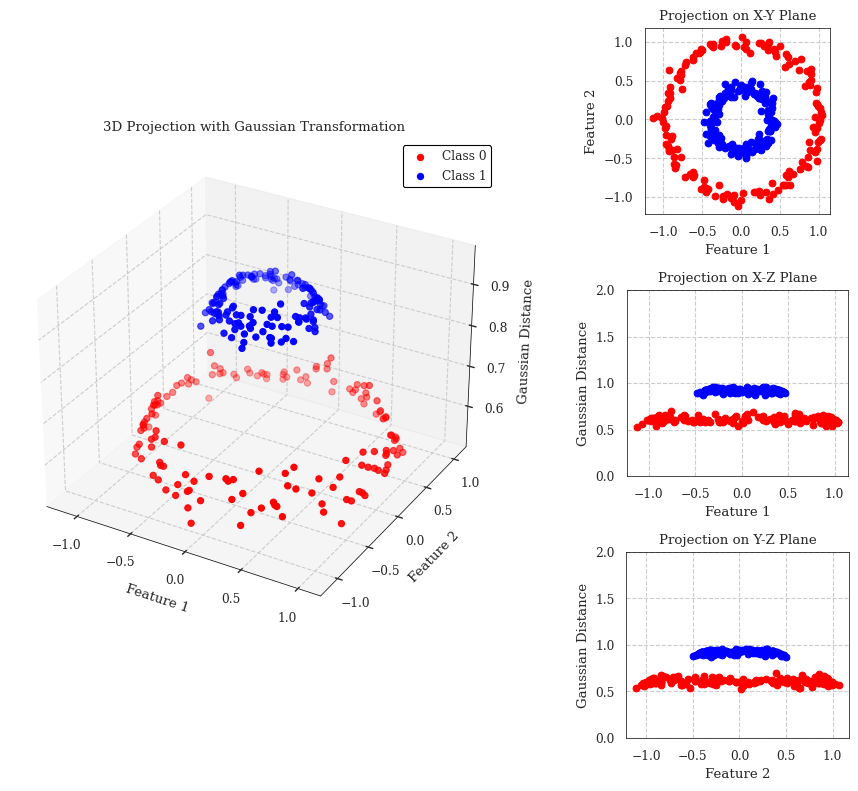

In [ ]:
# Step 5: Create a figure with a grid of subplots using subplot2grid
fig = plt.figure(figsize=(10, 8))

# Plot 3D projection in the first two columns, spanning 3 rows
ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=3, colspan=1, projection='3d')
ax1.scatter(X_gaussian_3D[y == 0][:, 0], X_gaussian_3D[y == 0][:, 1], X_gaussian_3D[y == 0][:, 2], color='red', label='Class 0')
ax1.scatter(X_gaussian_3D[y == 1][:, 0], X_gaussian_3D[y == 1][:, 1], X_gaussian_3D[y == 1][:, 2], color='blue', label='Class 1', zorder=3)

# Create a plane to show separation in the transformed space
# xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 10), np.linspace(-1.5, 1.5, 10))
zz = 0.75 * np.ones_like(xx)  # This represents a plane in 3D


# ax1.plot_surface(xx, yy, zz, alpha=0.3, color='gray')
ax1.set_title('3D Projection with Gaussian Transformation')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Gaussian Distance')
ax1.legend()

# Plot the X-Y projection on the second column, first row
ax2 = plt.subplot2grid((3, 2), (0, 1), colspan=1)  # First row, spans last two columns
ax2.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
ax2.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
ax2.set_title('Projection on X-Y Plane')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_aspect('equal')

# Plot the X-Z projection on the second column, second row
ax3 = plt.subplot2grid((3, 2), (1, 1), colspan=1)  # Second row, spans last two columns
ax3.scatter(X_gaussian_3D[y == 0][:, 0], X_gaussian_3D[y == 0][:, 2], color='red', label='Class 0')
ax3.scatter(X_gaussian_3D[y == 1][:, 0], X_gaussian_3D[y == 1][:, 2], color='blue', label='Class 1')
ax3.set_title('Projection on X-Z Plane')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Gaussian Distance')
ax3.set_aspect('equal')
ax3.set_ylim(0, 2)  # Set the y-axis

# Plot the Y-Z projection on the second column, third row
ax4 = plt.subplot2grid((3, 2), (2, 1), colspan=1)  # Third row, spans last two columns
ax4.scatter(X_gaussian_3D[y == 0][:, 1], X_gaussian_3D[y == 0][:, 2], color='red', label='Class 0')
ax4.scatter(X_gaussian_3D[y == 1][:, 1], X_gaussian_3D[y == 1][:, 2], color='blue', label='Class 1')
ax4.set_title('Projection on Y-Z Plane')
ax4.set_xlabel('Feature 2')
ax4.set_ylabel('Gaussian Distance')
ax4.set_aspect('equal')
ax4.set_ylim(0, 2)  # Set the y-axis

# Adjust layout for clarity and display the plots
plt.tight_layout()
plt.show()
